## Introduction to Probability and Statistics
## Assignment

In this assignment, we will use the dataset of diabetes patients taken [from here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

In [63]:
import pandas as pd
import numpy as np

df = pd.read_csv("../../data/diabetes.tsv",sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135



In this dataset, columns as the following:
* Age and sex are self-explanatory
* BMI is body mass index
* BP is average blood pressure
* S1 through S6 are different blood measurements
* Y is the qualitative measure of disease progression over one year

Let's study this dataset using methods of probability and statistics.

### Task 1: Compute mean values and variance for all values

In [66]:
mean_values = df.mean()
print(mean_values)

AGE     48.518100
SEX      1.468326
BMI     26.375792
BP      94.647014
S1     189.140271
S2     115.439140
S3      49.788462
S4       4.070249
S5       4.641411
S6      91.260181
Y      152.133484
dtype: float64


### Task 2: Plot boxplots for BMI, BP and Y depending on gender

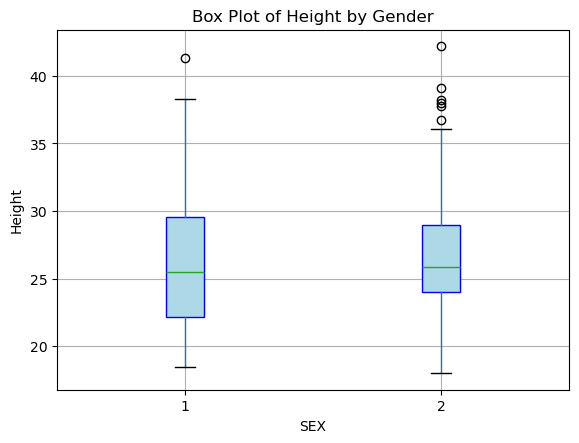

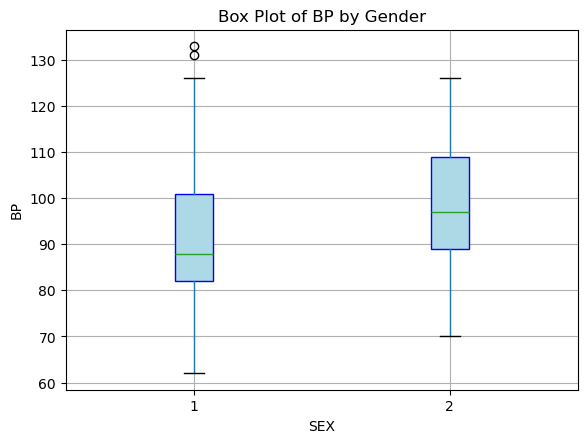

In [71]:
import matplotlib.pyplot as plt
df.boxplot(column='BMI', by='SEX', patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of Height by Gender')
plt.suptitle('')  # Remove the default 'Boxplot grouped by Gender' title
plt.ylabel('Height')
plt.show()

df.boxplot(column='BP', by='SEX', patch_artist=True, 
           boxprops=dict(facecolor='lightblue', color='blue'))
plt.title('Box Plot of BP by Gender')
plt.suptitle('')  # Remove the default 'Boxplot grouped by Gender' title
plt.ylabel('BP')
plt.show()

### Task 3: What is the the distribution of Age, Sex, BMI and Y variables?

In [85]:
distAge = df['AGE'].value_counts()
distSex = df['SEX'].describe()
distBMI = df['BMI'].describe()
distY = df['Y'].value_counts()
print(distAge,distSex,distBMI,distY)

AGE
53    19
60    17
51    16
41    15
48    14
34    14
61    14
52    14
67    13
50    13
47    12
57    12
49    12
55    12
62    11
54    11
37    11
46    11
42    10
59    10
58     9
36     9
56     9
28     8
68     7
44     7
43     7
65     7
32     7
35     7
38     6
29     6
66     6
33     6
69     6
39     6
40     5
64     5
71     5
25     5
31     4
22     4
63     4
45     4
23     4
27     4
24     3
20     3
19     3
30     3
21     2
26     2
79     2
75     2
72     1
74     1
70     1
73     1
Name: count, dtype: int64 count    442.000000
mean       1.468326
std        0.499561
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: SEX, dtype: float64 count    442.000000
mean      26.375792
std        4.418122
min       18.000000
25%       23.200000
50%       25.700000
75%       29.275000
max       42.200000
Name: BMI, dtype: float64 Y
200    6
72     6
90     5
178    5
71     5
      ..
73     1
222    1
86

### Task 4: Test the correlation between different variables and disease progression (Y)

> **Hint** Correlation matrix would give you the most useful information on which values are dependent.

In [91]:
correlation1 = df['SEX'].corr(df['Y'])
correlation2 = df['AGE'].corr(df['Y'])
correlation3 = df['BMI'].corr(df['Y'])
print(correlation1,correlation2,correlation3)

0.0430619984516054 0.18788875071891978 0.5864501344746885


### Task 5: Test the hypothesis that the degree of diabetes progression is different between men and women

In [103]:
from scipy import stats
men = df[df['SEX']==1]['Y']
women = df[df['SEX']==2]['Y']

t_stat, p_value = stats.ttest_ind(men, women) 

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05  # Significance level
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in diabetes progression between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in diabetes progression between men and women.")

T-statistic: -0.9041147550244715
P-value: 0.3664292946519826
Fail to reject the null hypothesis: There is no significant difference in diabetes progression between men and women.
